In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.keras.models as models

In [3]:
(X_train, y_train), (X_test, y_test) = load_data()

In [4]:
X_train.shape

(60000, 28, 28)

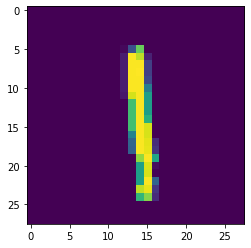

In [5]:
plt.imshow(X_train[8])

In [6]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)

In [7]:
X_train.shape

(60000, 28, 28, 1)

In [8]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

In [9]:
X_test.shape

(10000, 28, 28, 1)

In [10]:
X_train = X_train / 255.0
X_test = X_test /255.0

In [11]:
inp_shape = X_train.shape[1:]
inp_shape

(28, 28, 1)

In [12]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', 
                  padding='same', input_shape=inp_shape),
    layers.MaxPool2D((2, 2)), 
    layers.Dropout(0.2),
    layers.Conv2D(48, (3, 3), padding='same', activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 48)        13872     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 48)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2352)              0

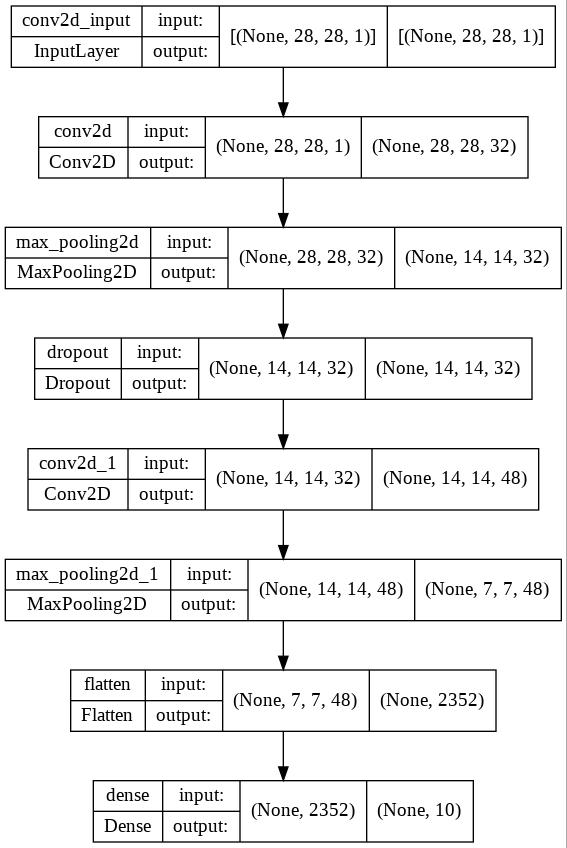

In [14]:
plot_model(model, 'model.jpg', show_shapes=True)

In [15]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

In [57]:
hst = model.fit(X_train, y_train, epochs=2, batch_size=128, verbose=1, validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 54s 143ms/step - loss: 0.0694 - accuracy: 0.9788 - val_loss: 0.0620 - val_accuracy: 0.9826
Epoch 2/2
375/375 [==============================] - 53s 140ms/step - loss: 0.0563 - accuracy: 0.9825 - val_loss: 0.0537 - val_accuracy: 0.9829


In [19]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(loss, accuracy)

0.06314782053232193 0.9804999828338623


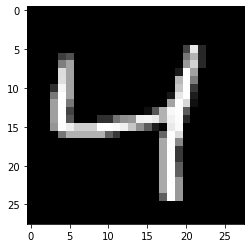

In [21]:
image = X_train[2]
plt.imshow(np.squeeze(image), cmap='gray')
plt.show()

In [22]:
image.shape

(28, 28, 1)

In [23]:
img_test = image.reshape(1, 28, 28, 1)

In [24]:
pred = model.predict([img_test])

In [25]:
pred

array([[2.9751452e-09, 2.9273922e-05, 1.3639239e-05, 5.1492509e-05,
        9.9966788e-01, 2.4907891e-07, 2.4968392e-07, 2.9849021e-05,
        1.4529024e-06, 2.0588402e-04]], dtype=float32)

In [26]:
cls = np.argmax(pred)
cls

4

In [58]:
import matplotlib.pyplot as plt
import cv2 as cv

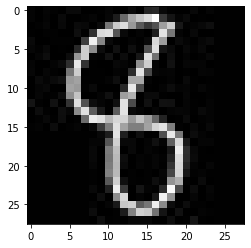

In [59]:
img_pr_dir='/content/drive/MyDrive/test_img/8888.jpg'


test_image = cv.imread(img_pr_dir, cv.IMREAD_GRAYSCALE)
plt.imshow(test_image, cmap='gray')

In [60]:
test_image

array([[  3,   0,   4,   2,   0,   7,   7,   0,   0,   1,   4,   0,   0,
          8,   1,  28,  30,   6,   1,   0,   0,   6,   0,   4,   1,   1,
          1,   1],
       [  3,   0,   3,   0,   7,   0,   0,   2,   4,   0,   5,  21,  78,
        124, 146, 162, 189,  42,  15,   3,   8,   0,   1,   0,   1,   1,
          1,   1],
       [  0,   2,   5,   0,   6,   0,   8,   6,   0,   8,  88, 150, 164,
        113,  66,  42,  61, 117, 152,  17,   2,   3,   6,  11,   1,   1,
          1,   1],
       [  1,   0,   2,   2,   0,   0,  11,   1,  36, 161, 166,  63,   7,
          0,   3,   0,  22, 169,  88,   3,   0,   6,   0,   0,   1,   1,
          1,   1],
       [  7,   0,   0,   2,   2,   2,   0,  47, 178,  99,   7,   1,   0,
          3,   1,   7, 159, 117,   0,   8,   3,   0,   5,   8,   1,   1,
          1,   1],
       [  5,   2,   6,   0,   1,   0,  30, 152, 104,   9,   0,  12,   0,
         11,   2,  60, 164,  16,   8,   0,   6,   2,   6,   0,   1,   1,
          1,   1],
       [  

In [61]:
test_image.shape

(28, 28)

In [62]:
test_image = test_image.reshape(1, 28, 28, 1) /255.0

In [63]:
test_image.shape

(1, 28, 28, 1)

In [64]:
pred2 = model.predict(test_image)
pred2

array([[1.31755432e-05, 2.46601761e-04, 1.07653083e-04, 9.84414667e-03,
        1.46414071e-01, 3.57572347e-01, 3.28359723e-01, 1.02515034e-04,
        1.55863866e-01, 1.47592172e-03]], dtype=float32)

In [65]:
cls2 = np.argmax(pred2)
cls2

5